In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from sklearn.linear_model import LinearRegression


# Resorte estático

In [30]:
static_measurement = pd.read_csv("./data/estatico.csv")
static_measurement

,Desplazamiento(m),Fuerza
0,0.018,0.573750
1,0.065,0.966654
2,0.100,1.295298
3,0.147,1.655154
4,0.206,2.111400
5,0.177,1.880982
6,0.250,2.438208
7,0.083,1.163106
8,0.130,1.563354
9,0.039,0.823446


In [31]:
model = LinearRegression().fit(static_measurement["Desplazamiento(m)"].to_frame(),static_measurement["Fuerza"])
model_r2 = model.score(static_measurement["Desplazamiento(m)"].to_frame(),static_measurement["Fuerza"])
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


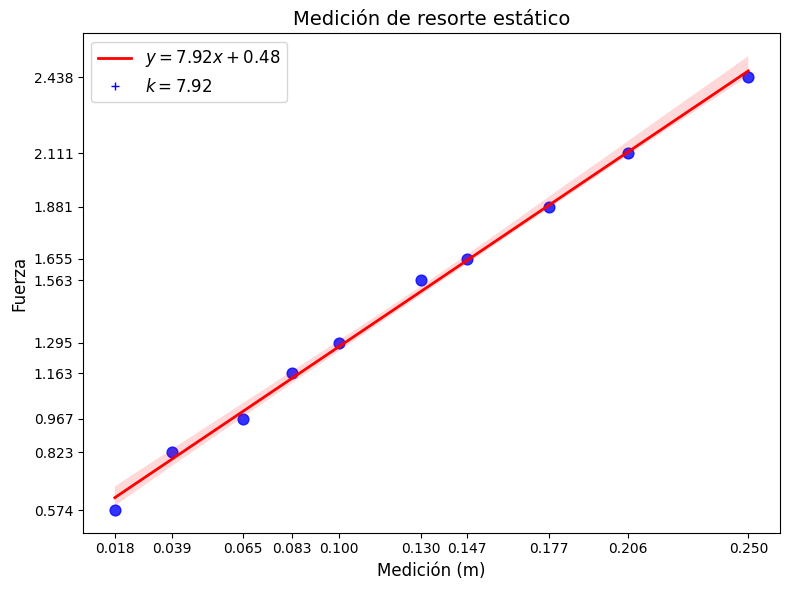

In [32]:
def static_elastic_plot(dataset:pd.DataFrame, measurement_column:str, force_column:str, linear_model:LinearRegression, save_path:str):
    plt.figure(figsize=(8,6))

    # Graficar con seaborn
    sns.regplot(
        data=dataset, x=measurement_column, y=force_column,
        scatter_kws={"color": "blue", "s": 60},  # puntos de medición
        line_kws={"color": "red", "lw": 2}       # línea de regresión
    )

    # Etiquetas de ejes
    plt.xlabel("Medición (m)", fontsize=12)
    plt.ylabel(force_column, fontsize=12)


    plt.xticks(dataset[measurement_column])
    plt.yticks(dataset[force_column])

    handles = [
        Line2D([0], [0], color="red", lw=2, label=fr"$y = {linear_model.coef_[0]:.2f}x + {linear_model.intercept_:.2f}$"),
        Line2D([0], [0], marker="+", color="blue", lw=0, label=fr"$k = {linear_model.coef_[0]:.2f}$")
    ]

    plt.legend(handles=handles, loc="upper left", fontsize=12)
    plt.title("Medición de resorte estático", fontsize=14)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

static_elastic_plot(static_measurement, "Desplazamiento(m)", "Fuerza", model, "./graficos/resorte_estatico.png")

## Cálculo de error mínimo cuadrado

$$
\sqrt{\left(\frac{pendiente^2}{mediciones - 2} \right)\left(\frac{1}{R^2} - 1\right)}
$$


In [33]:
def mse(slope:float, measurements:int, r2_score:float) -> float:
    return np.sqrt(
        (slope ** 2 / (measurements - 2)) * ( 1 / r2_score - 1)
    )

In [34]:
mse_static = mse(model.coef_[0],static_measurement.size, model_r2)

In [35]:
f"El error mínimo cuadrado de la función {round(model.coef_[0],3)}x + {round(model.intercept_, 3)} que tiene r² {round(model_r2,3)} es {round(mse_static,3)}"

'El error mínimo cuadrado de la función 7.924x + 0.484 que tiene r² 0.997 es 0.099'

---

# Resorte Dinámico

In [36]:
dynamic_measurement = pd.read_csv("./data/dinamico.csv")
dynamic_measurement

,periodo_cuadrado,masa(kg)
0,0.145924,0.0597
1,0.368449,0.0999
2,0.492804,0.1085
3,0.599076,0.1285
4,0.885481,0.1998
5,0.921600,0.2085
6,0.923521,0.2023
7,1.026169,0.2222
8,1.102500,0.2422
9,1.147041,0.2494


In [37]:
dynamic_model = LinearRegression().fit(dynamic_measurement["periodo_cuadrado"].to_frame(), dynamic_measurement["masa(kg)"])
dynamic_r2  = dynamic_model.score(dynamic_measurement["periodo_cuadrado"].to_frame(), dynamic_measurement["masa(kg)"])
dynamic_model


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


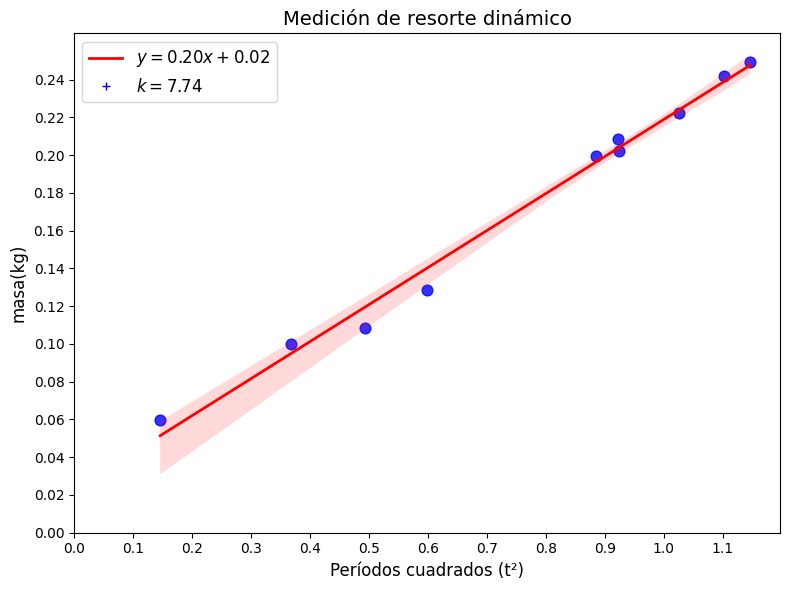

In [38]:
def dynamic_elastic_plot(dataset:pd.DataFrame, measurement_column:str, force_column:str, linear_model:LinearRegression, save_path:str):
    plt.figure(figsize=(8,6))

    # Graficar con seaborn
    sns.regplot(
        data=dataset, x=measurement_column, y=force_column,
        scatter_kws={"color": "blue", "s": 60},  # puntos de medición
        line_kws={"color": "red", "lw": 2}       # línea de regresión
    )

    # Etiquetas de ejes
    plt.xlabel("Períodos cuadrados (t²)", fontsize=12)
    plt.ylabel(force_column, fontsize=12)


    plt.xticks(np.arange(0,dataset[measurement_column].max(), 0.1))
    plt.yticks(np.arange(0,dataset[force_column].max(), 0.02))

    k = linear_model.coef_[0] * (2 * np.pi)**2
    handles = [
        Line2D([0], [0], color="red", lw=2, label=fr"$y = {linear_model.coef_[0]:.2f}x + {linear_model.intercept_:.2f}$"),
        Line2D([0], [0], marker="+", color="blue", lw=0, label=fr"$k = {k:.2f}$"),
    ]

    plt.legend(handles=handles, loc="upper left", fontsize=12)
    plt.title("Medición de resorte dinámico", fontsize=14)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

dynamic_elastic_plot(dynamic_measurement, "periodo_cuadrado", "masa(kg)", dynamic_model, "./graficos/resorte_dinamico.png")

## Cálculo de k

$$
k = \text{pendiente} \cdot (2 \pi)^2
$$

In [39]:
k_dynamic = dynamic_model.coef_[0] * (2 * np.pi)**2
f"El k deducido de esta ecuación es {round(k_dynamic,3)}"

'El k deducido de esta ecuación es 7.744'

## Cálculo del error mínimo cuadrado

$$
\sqrt{\left(\frac{pendiente^2}{mediciones - 2} \right)\left(\frac{1}{R^2} - 1\right)}
$$


In [40]:
mse_dynamic = mse(dynamic_model.coef_[0],dynamic_measurement.size, dynamic_r2)


In [41]:
f"El error mínimo cuadrado de la función {round(dynamic_model.coef_[0],3)}x + {round(dynamic_model.intercept_, 3)} que tiene r² {round(dynamic_r2,3)} es {round(mse_dynamic,3)}"

'El error mínimo cuadrado de la función 0.196x + 0.023 que tiene r² 0.99 es 0.005'

---

# Péndulo

In [ ]:
pendulum = pd.read_csv("./data/pendulo.csv")
pendulum

,PeriodoCuadrado,L_hilo(m),Periodo
0,2.059225,0.53,1.435
1,2.521744,0.64,1.588
2,2.907025,0.76,1.705
3,3.470769,0.90,1.863
4,3.873024,1.00,1.968
5,4.313929,1.10,2.077
6,5.035536,1.30,2.244
7,5.541316,1.43,2.354
8,6.091024,1.56,2.468
9,6.604900,1.69,2.570


## Ley del péndulo

$$
T = 2 \pi \sqrt{\frac{L}{g}}
$$


Para hacer función de $L$

$$
L = \frac{g \, T^2}{(2 \pi)^2}
$$


In [55]:
pendulum["Predictor"] = pendulum["PeriodoCuadrado"].apply(lambda periodo_2: (9.8 * periodo_2)/ (2*np.pi)**2)
pendulum

,PeriodoCuadrado,L_hilo(m),Periodo,Predictor
0,2.059225,0.53,1.435,0.511176
1,2.521744,0.64,1.588,0.625990
2,2.907025,0.76,1.705,0.721631
3,3.470769,0.90,1.863,0.861573
4,3.873024,1.00,1.968,0.961427
5,4.313929,1.10,2.077,1.070876
6,5.035536,1.30,2.244,1.250006
7,5.541316,1.43,2.354,1.375559
8,6.091024,1.56,2.468,1.512017
9,6.604900,1.69,2.570,1.639580


In [56]:
pendulum_model = LinearRegression().fit(pendulum["Predictor"].to_frame(), pendulum["L_hilo(m)"])
pendulum_r2 = pendulum_model.score(pendulum["Predictor"].to_frame(), pendulum["L_hilo(m)"])


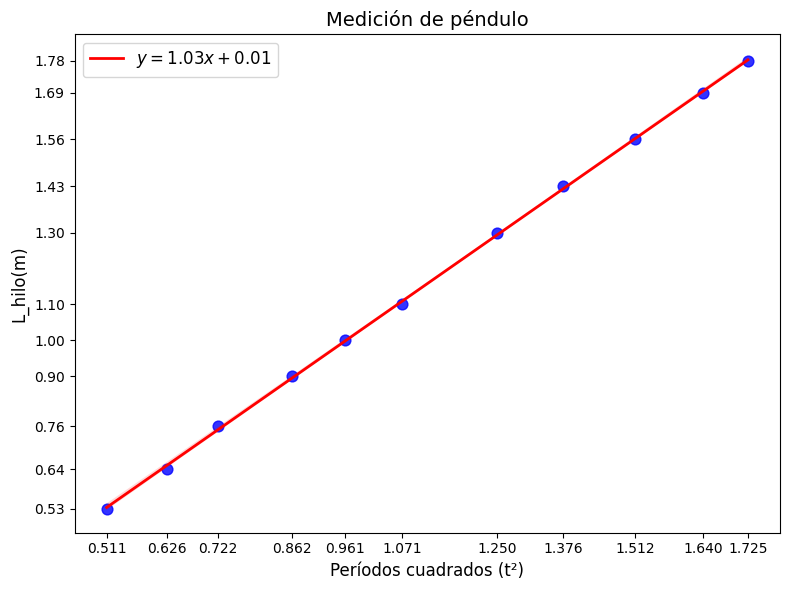

In [ ]:
def pendulum_plot(dataset:pd.DataFrame, measurement_column:str, force_column:str, linear_model:LinearRegression, save_path:str):
    plt.figure(figsize=(8,6))

    # Graficar con seaborn
    sns.regplot(
        data=dataset, x=measurement_column, y=force_column,
        scatter_kws={"color": "blue", "s": 60},  # puntos de medición
        line_kws={"color": "red", "lw": 2}       # línea de regresión
    )

    # Etiquetas de ejes
    plt.xlabel("Períodos cuadrados (t²)", fontsize=12)
    plt.ylabel(force_column, fontsize=12)

    plt.xticks(dataset[measurement_column])
    plt.yticks(dataset[force_column])
    handles = [
        Line2D([0], [0], color="red", lw=2, label=fr"$y = {linear_model.coef_[0]:.2f}x + {linear_model.intercept_:.2f}$"),
    ]

    plt.legend(handles=handles, loc="upper left", fontsize=12)
    plt.title("Medición de péndulo", fontsize=14)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

pendulum_plot(pendulum, "Predictor", "L_hilo(m)", pendulum_model, "./graficos/pendulo.png")

## Para hacer en funcion de g


Si elevamos ambos términos al cuadrado tenemos 
$$
T^2 = (2 \pi)^2 \frac{L}{g}
$$

Multiplicamos por g de ambos lados
$$
g \, T^2 = (2 \pi)^2 L
$$

Y finalmente dividimos por $T^2$
$$
g = \frac{(2 \pi)^2 L}{T^2}
$$





Calculamos la ecuación

In [60]:
pendulum["G_Real"] = 9.8
pendulum["Predictor_G"] = pendulum.apply(lambda row: ((2 * np.pi)**2 * row["L_hilo(m)"]) / row["PeriodoCuadrado"], axis=1)
pendulum

,PeriodoCuadrado,L_hilo(m),Periodo,Predictor,Predictor_G,G_Real
0,2.059225,0.53,1.435,0.511176,10.160891,9.8
1,2.521744,0.64,1.588,0.625990,10.019331,9.8
2,2.907025,0.76,1.705,0.721631,10.321066,9.8
3,3.470769,0.90,1.863,0.861573,10.237090,9.8
4,3.873024,1.00,1.968,0.961427,10.193177,9.8
5,4.313929,1.10,2.077,1.070876,10.066522,9.8
6,5.035536,1.30,2.244,1.250006,10.191952,9.8
7,5.541316,1.43,2.354,1.375559,10.187857,9.8
8,6.091024,1.56,2.468,1.512017,10.110998,9.8
9,6.604900,1.69,2.570,1.639580,10.101368,9.8


In [61]:
g_model = LinearRegression().fit(pendulum["Predictor_G"].to_frame(), pendulum["G_Real"])

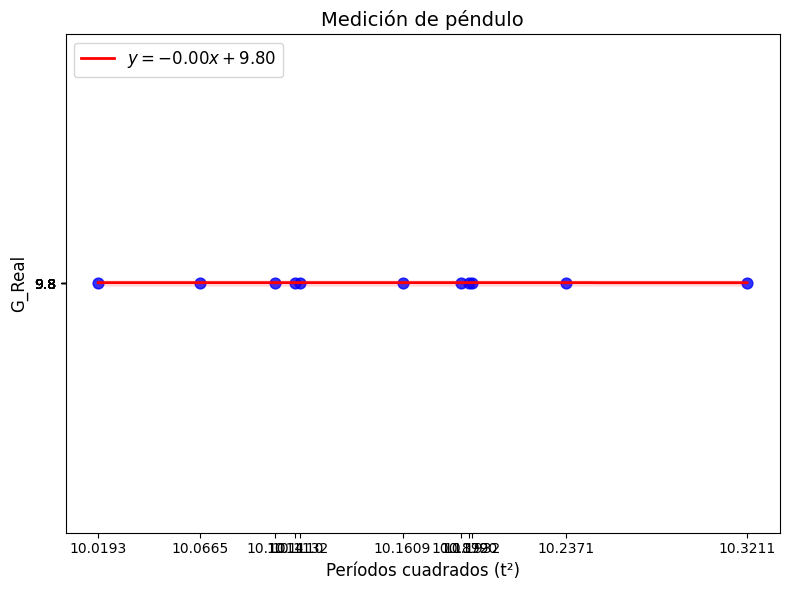

In [71]:
pendulum_plot(pendulum, "Predictor_G", "G_Real", g_model, "./graficos/pendulo_g.png")
